In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
ffdf = pd.read_csv(r'C:\Users\Upgraded_sadar\Desktop\dek\Datasets\Forest Fire\forestfires.csv')
ffdf

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


Attribute Information

In [3]:
#X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
#Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
#month - month of the year: "jan" to "dec"
#day - day of the week: "mon" to "sun"
#FFMC - FFMC index from the FWI system: 18.7 to 96.20
#DMC - DMC index from the FWI system: 1.1 to 291.3
#DC - DC index from the FWI system: 7.9 to 860.6
#ISI - ISI index from the FWI system: 0.0 to 56.10
#temp - temperature in Celsius degrees: 2.2 to 33.30
#RH - relative humidity in %: 15.0 to 100
#wind - wind speed in km/h: 0.40 to 9.40
#rain - outside rain in mm/m2 : 0.0 to 6.4
#area - the burned area of the forest (in ha): 0.00 to 1090.84 (this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform).

Data Overview & Summary Stats

In [8]:
ffdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [9]:
ffdf.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [10]:
#there are no missing values and we have also known the basic summary of the dataset

Seperating Numrical and Categorial Columns

In [11]:
ffdf.describe(include=["float", "int"])

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [12]:
ffdf.describe(include=['O'])

,month,day
count,517,517
unique,12,7
top,aug,sun
freq,184,95


In [13]:
#frequency of each day
ffdf['month'].value_counts()

month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: count, dtype: int64

In [14]:
#frequency of each month
ffdf['month'].value_counts()

month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: count, dtype: int64

Renaming and Adding Column

In [15]:
rename_columns={
    'month' : 'Month',
    'day' : 'Day',
    'FFMC' : 'Fine Fuel Moisture Code',
    'DMC' : 'Deep Moist',
    'DC' : 'Drought Code',
    'ISI' : 'Initial Spread Index',
    'temp' : 'Temperature(C)',
    'wind' : 'Wind(Km/h)',
    'rain' : 'Rain(mm/sqm)',
    'area' : 'Area(Hec)'
}
ffdf = ffdf.rename(columns=rename_columns)
ffdf['Area(Km)'] = ffdf['Area(Hec)']/100
ffdf

,X,Y,Month,Day,Fine Fuel Moisture Code,Deep Moist,Drought Code,Initial Spread Index,Temperature(C),RH,Wind(Km/h),Rain(mm/sqm),Area(Hec),Area(Km)
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0.0000
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0.0000
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0.0000
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0.0000
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0.0644
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0.5429
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0.1116
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.0000


In [16]:
rename_columns={
    'Deep Moist' : 'Deep Moist Convection'}
ffdf = ffdf.rename(columns=rename_columns)

In [13]:
ffdf

,X,Y,Month,Day,Fine Fuel Moisture Code,Deep Moist Convection,Drought Code,Initial Spread Index,Temperature(C),RH,Wind(Km/h),Rain(mm/sqm),Area(Hec),Area(Km)
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0.0000
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0.0000
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0.0000
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0.0000
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0.0644
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0.5429
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0.1116
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.0000


In [17]:
columns_to_capitalize = ['Month', 'Day']
for column in columns_to_capitalize:
    ffdf[column] = ffdf[column].str.title()
ffdf

,X,Y,Month,Day,Fine Fuel Moisture Code,Deep Moist Convection,Drought Code,Initial Spread Index,Temperature(C),RH,Wind(Km/h),Rain(mm/sqm),Area(Hec),Area(Km)
0,7,5,Mar,Fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0.0000
1,7,4,Oct,Tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0.0000
2,7,4,Oct,Sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0.0000
3,8,6,Mar,Fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0.0000
4,8,6,Mar,Sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,Aug,Sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0.0644
513,2,4,Aug,Sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0.5429
514,7,4,Aug,Sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0.1116
515,1,4,Aug,Sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.0000


In [18]:
#Highest_area_by_Km
ffdf.sort_values(by='Area(Km)', ascending=False).head()

,X,Y,Month,Day,Fine Fuel Moisture Code,Deep Moist Convection,Drought Code,Initial Spread Index,Temperature(C),RH,Wind(Km/h),Rain(mm/sqm),Area(Hec),Area(Km)
238,6,5,Sep,Sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84,10.9084
415,8,6,Aug,Thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28,7.4628
479,7,4,Jul,Mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53,2.7853
237,1,2,Sep,Tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88,2.1288
236,2,2,Sep,Sat,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94,2.0094


Correlation_Matrix

In [19]:
categorial_feature = ffdf.describe(include=['O']).columns
print(list(categorial_feature))
numerical_feature = ffdf.describe(include=["float", "int"]).columns
print(list(numerical_feature))

['Month', 'Day']
['X', 'Y', 'Fine Fuel Moisture Code', 'Deep Moist Convection', 'Drought Code', 'Initial Spread Index', 'Temperature(C)', 'RH', 'Wind(Km/h)', 'Rain(mm/sqm)', 'Area(Hec)', 'Area(Km)']


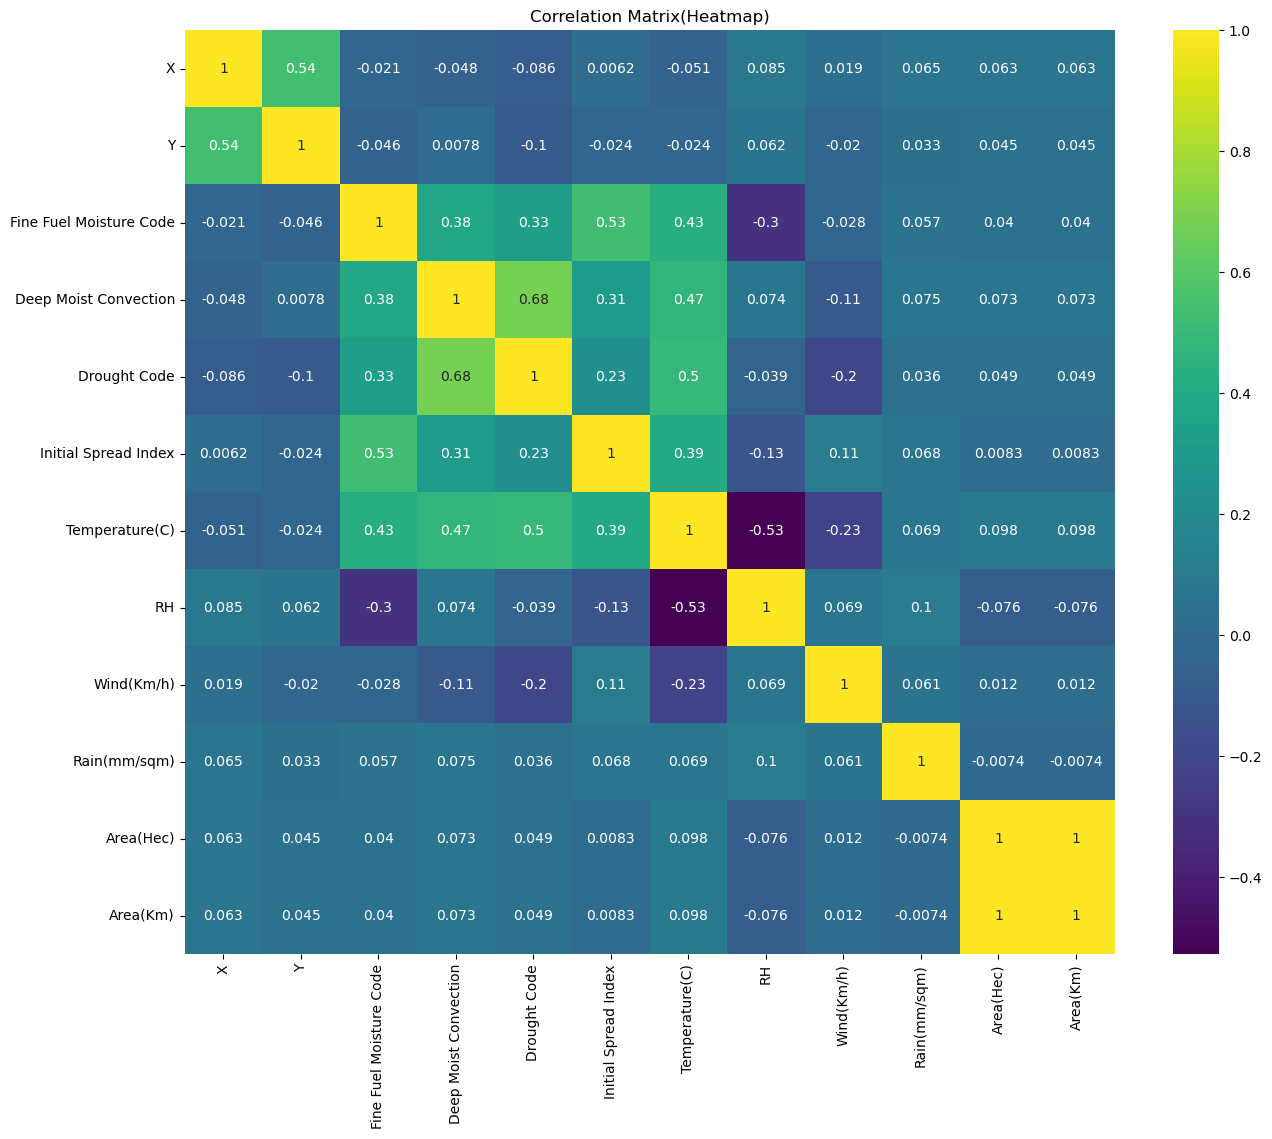

In [20]:
plt.figure(figsize=(15, 12))
sns.heatmap(ffdf[numerical_feature].corr(), annot=True, cmap='viridis')
plt.title("Correlation Matrix(Heatmap)")
plt.show()

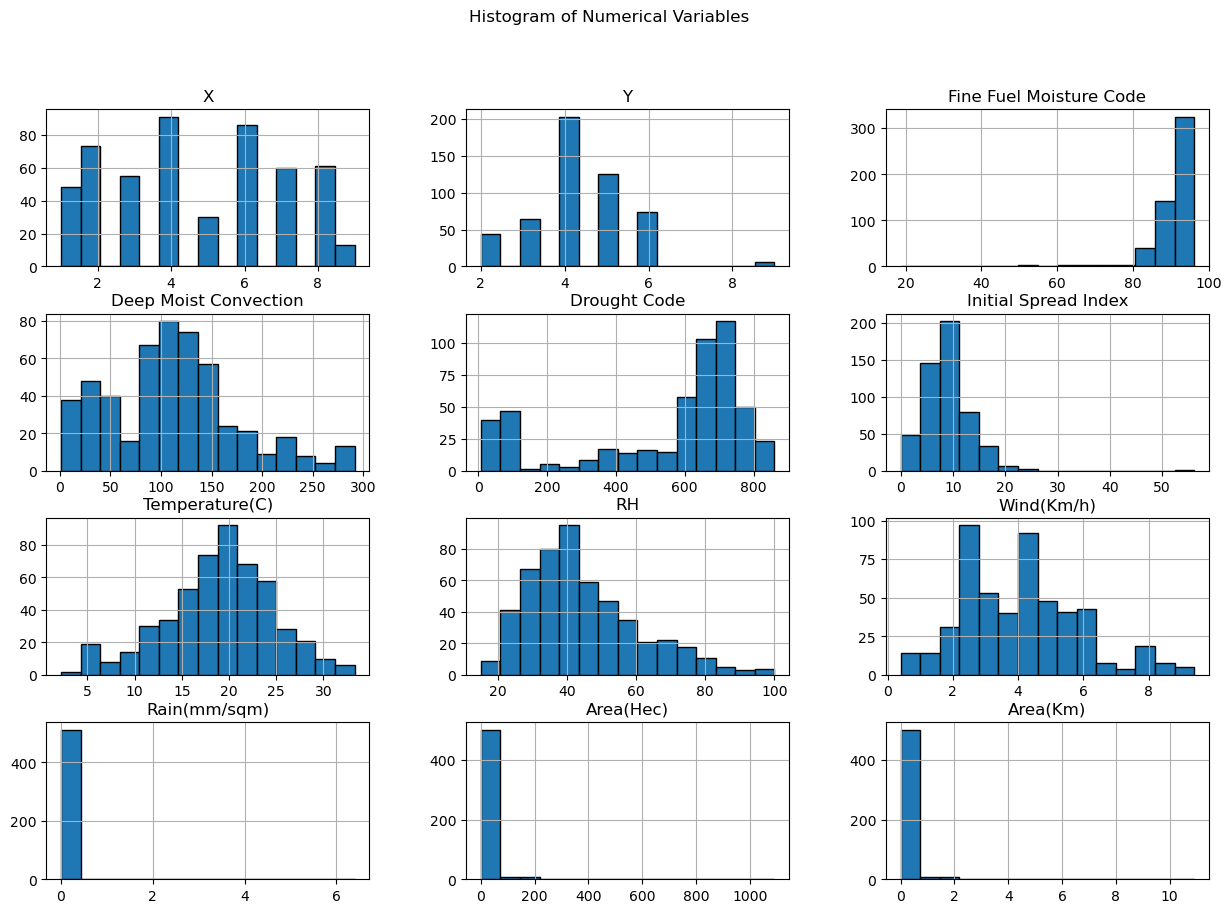

In [21]:
#Histogram of Numerical Variables
ffdf.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histogram of Numerical Variables')
plt.show()

C:\Users\Upgraded_sadar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Upgraded_sadar\AppData\Local\Temp\ipykernel_9244\1496073470.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x1000 with 0 Axes>

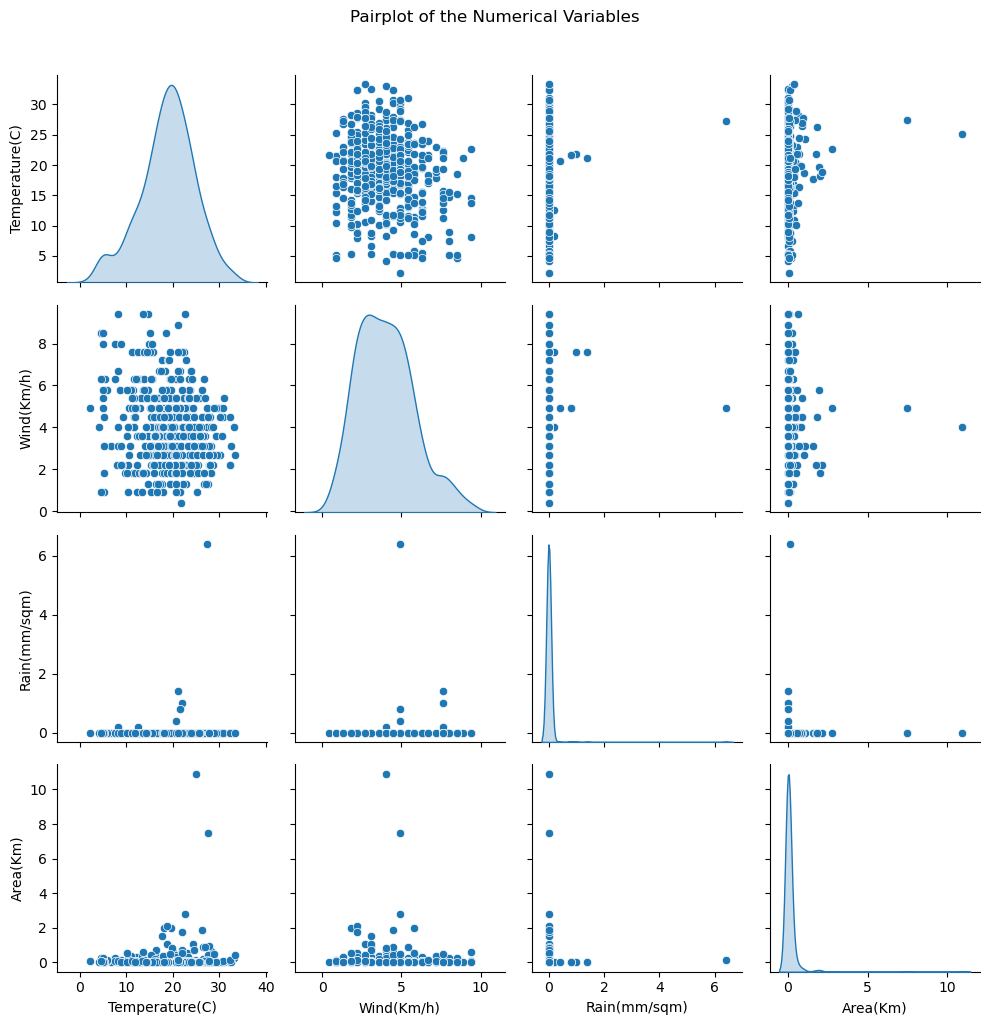

In [22]:
#Pairplot
import numpy as np
columns_of_interest = ['Temperature(C)', 'Wind(Km/h)', 'Rain(mm/sqm)', 'Area(Km)']
plt.figure(figsize=(10, 10))
sns.pairplot(ffdf[columns_of_interest], diag_kind='kde')
plt.suptitle('Pairplot of the Numerical Variables', y=1.02)
plt.tight_layout()
plt.show()

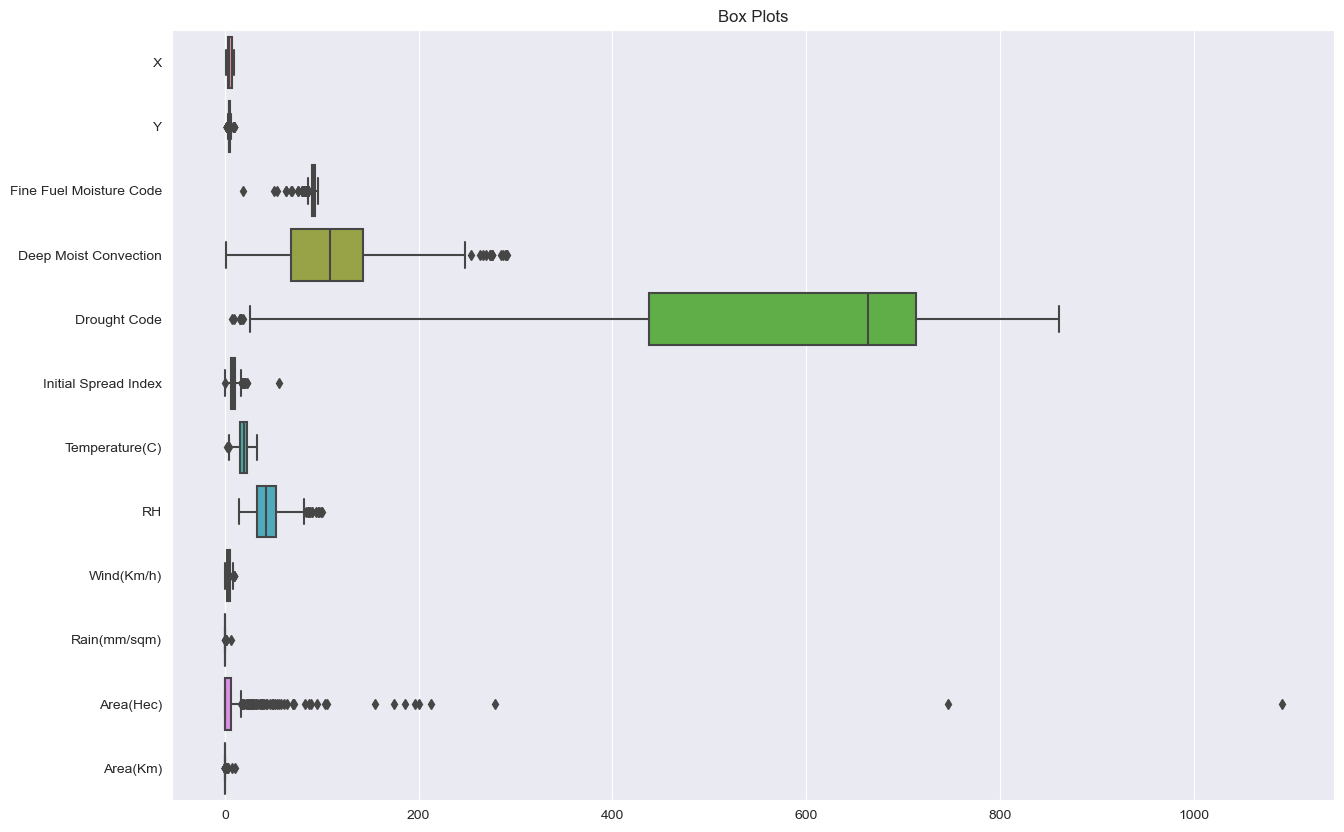

In [29]:
#Box Plot
plt.figure(figsize=(15,10))
sns.boxplot(data=ffdf.select_dtypes(include='number'), orient='h')
plt.title('Box Plots')
plt.show()

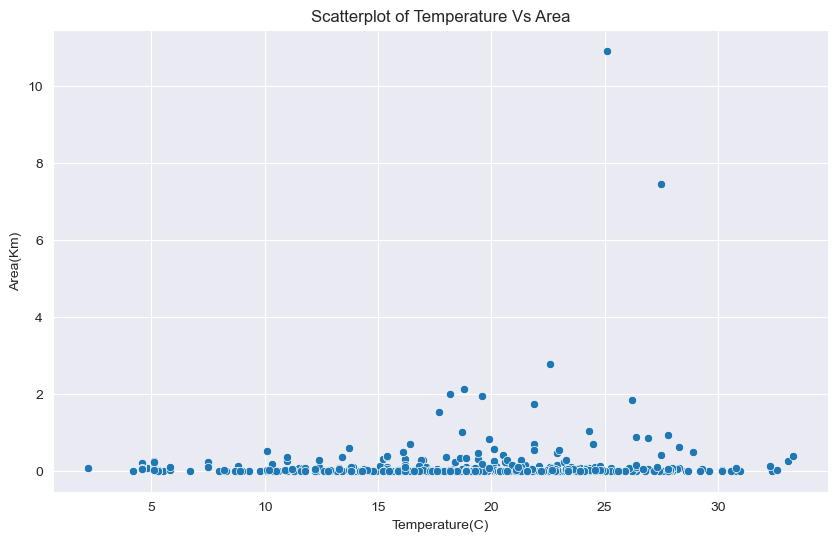

In [30]:
#Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Temperature(C)', y='Area(Km)', data=ffdf)
plt.title('Scatterplot of Temperature Vs Area')
plt.show()

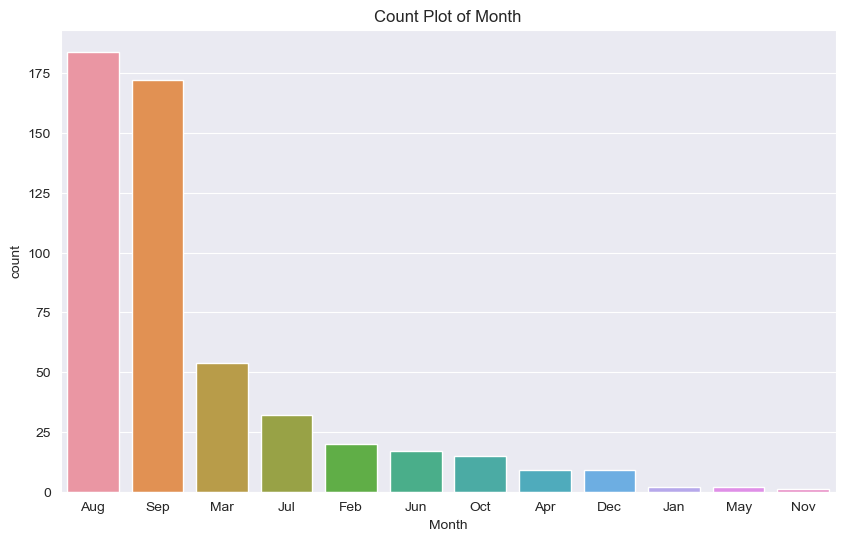

In [26]:
#Count Plot for Month
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.countplot(x='Month', data=ffdf, order=ffdf['Month'].value_counts().index)
plt.title('Count Plot of Month')
plt.show()

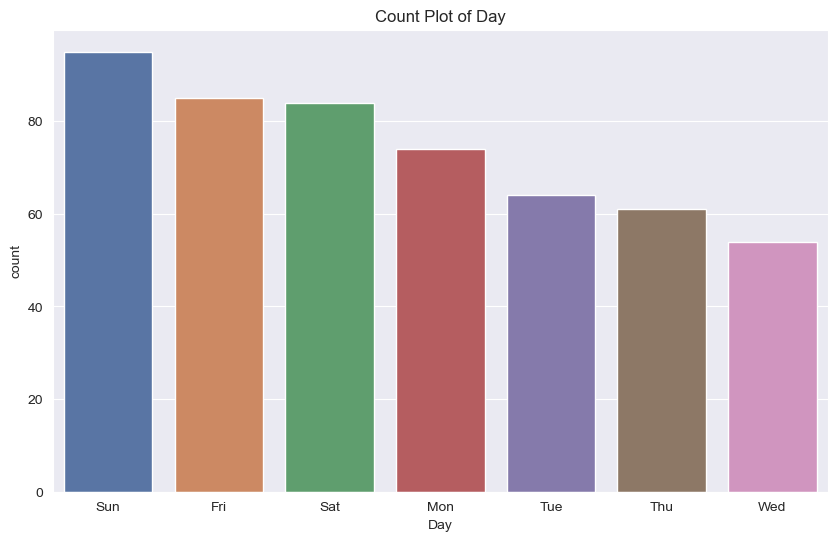

In [31]:
#Count Plot for Day
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.countplot(x='Day', data=ffdf, order=ffdf['Day'].value_counts().index, palette='deep')
plt.title('Count Plot of Day')
plt.show()